### Dataset description
**Source**: Google Analytics hit (pageview) level data, by date and by article title.

**Field descriptions**:
- Date - year, month, day of hit.
- Page Title - article title that was viewed by user
- Age - age of user that visited the site
- Gender - gender of user that visited the site
- Source/Medium - the referral source of the hit or the website that the user was on before visiting whowhatwear.com
- Pageviews - a hit of a url on our site that is being tracked by theAnalytics tracking code.
- Unique Pageviews - represents the number of sessions during which that page was viewed one or more times.

## Question 2: What content resonates with her? What are the themes and frames that drive engagement?

For the sake of this assessment, only the top audience demographic, **women ages 25-24**, will be analyzed in order to answer the questions above. Within the dataset, the two most applicable columns with content information are *Pageviews, Unique Pageviews, and Page Title*. It will also be assumed that an article with the most unique page views, meaning more sessions by readers, will be content that resonates the most with the core audience.

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np

# Import data
%store -r customer_df
print(customer_df.shape)
customer_df.head()

(32755, 7)


,Date,Page Title,Age,Gender,Source / Medium,Pageviews,Unique Pageviews
0,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend | W...,35-44,female,m.facebook.com / referral,35541,31670
1,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend | W...,25-34,female,m.facebook.com / referral,29730,26236
2,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend | W...,35-44,female,m.facebook.com / referral,21249,18923
3,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend | W...,45-54,female,m.facebook.com / referral,18858,16825
4,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend | W...,25-34,female,m.facebook.com / referral,18157,15970


*Create a dataframe with the top audience demographic selected:*

In [2]:
# Select 25-34 age group
core_audience = customer_df.loc[customer_df['Age'] == '25-34']

# Select females in dataset
core_audience = core_audience.loc[core_audience['Gender'] == 'female']

# Verify output
np.unique(core_audience.Age), np.unique(core_audience.Gender)

(array(['25-34'], dtype=object), array(['female'], dtype=object))

In [3]:
# Drop unnecessary columns
content_df = core_audience.drop(columns=['Age', 'Gender'])
print(content_df.shape)
content_df.head()

(9183, 5)


,Date,Page Title,Source / Medium,Pageviews,Unique Pageviews
1,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend | W...,m.facebook.com / referral,29730,26236
4,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend | W...,m.facebook.com / referral,18157,15970
5,2019-06-20,The Best Miami Summer Trends for Under $100 | ...,m.facebook.com / referral,16874,14081
9,2019-06-02,These Stylish Summer Outfits Are Surprisingly ...,m.facebook.com / referral,15429,13141
11,2019-06-04,The 19 Best Shopping Picks for May 2019 | Who ...,newsletter / email,14276,11435


In [4]:
# Sort dataframe by pageviews, since more pageviews indicates more resonating
content_df = content_df.sort_values(by='Pageviews', ascending=False)
content_df.head()

,Date,Page Title,Source / Medium,Pageviews,Unique Pageviews
1,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend | W...,m.facebook.com / referral,29730,26236
4,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend | W...,m.facebook.com / referral,18157,15970
5,2019-06-20,The Best Miami Summer Trends for Under $100 | ...,m.facebook.com / referral,16874,14081
9,2019-06-02,These Stylish Summer Outfits Are Surprisingly ...,m.facebook.com / referral,15429,13141
11,2019-06-04,The 19 Best Shopping Picks for May 2019 | Who ...,newsletter / email,14276,11435


In [5]:
# Assess the contents of the Page Title column
content_df.iloc[0]['Page Title'], content_df.iloc[1]['Page Title'], content_df.iloc[2]['Page Title']

('Chrissy Teigen Wore the Pleated-Jean Trend | Who What Wear',
 'Chrissy Teigen Wore the Pleated-Jean Trend | Who What Wear',
 'The Best Miami Summer Trends for Under $100 | Who What Wear')

In [6]:
# Remove "| Who What Wear" from titles
new_title = []
for title in content_df['Page Title']:
    new_string = title.replace(' | Who What Wear', '')
    new_title.append(new_string)

In [7]:
# Replace Page Title contents
content_df['PageTitle'] = pd.Series(new_title)
content_df.head(2)

,Date,Page Title,Source / Medium,Pageviews,Unique Pageviews,PageTitle
1,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend | W...,m.facebook.com / referral,29730,26236,Chrissy Teigen Wore the Pleated-Jean Trend
4,2019-06-08,Chrissy Teigen Wore the Pleated-Jean Trend | W...,m.facebook.com / referral,18157,15970,The 19 Best Shopping Picks for May 2019


In [8]:
# Combine duplicate Pageviews of Page Titles 
print(content_df.shape)
combo_content_df = content_df.groupby(['PageTitle', 'Source / Medium', ]).sum().sort_values(by='Pageviews', ascending=False).reset_index()
combo_content_df.shape

(9183, 6)


(2230, 4)

In [9]:
combo_content_df.head()

,PageTitle,Source / Medium,Pageviews,Unique Pageviews
0,Chrissy Teigen Wore the Pleated-Jean Trend,m.facebook.com / referral,45438,38499
1,Summer Wedding Makeup,m.facebook.com / referral,45233,39148
2,Summer Beauty Buys,m.facebook.com / referral,44728,38273
3,Chrissy Teigen Wore the Pleated-Jean Trend,newsletter / email,31273,25256
4,5 Summer Dress Trends That Will Be Everywhere ...,m.facebook.com / referral,30030,24987


In [10]:
%store combo_content_df

Stored 'combo_content_df' (DataFrame)


*NLP the Page Title of Articles in the Top 25% of Pageviews*

In [11]:
# Import necessary modules
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [12]:
percent_25 = round(len(combo_content_df)*0.25)
print(percent_25)
top_25_percentile = combo_content_df.head(percent_25)
top_25_percentile.shape

558


(558, 4)

In [13]:
# Create a list of all combined words
all_words = top_25_percentile['PageTitle'].str.cat(sep=' ')

# Create stopwords filter
stop_words = set(stopwords.words('english'))

# Tokenize words
word_tokens = word_tokenize(all_words)

# Remove stopwords from tokenized words
filtered_words = [w.lower() for w in word_tokens if not w.lower() in stop_words] 

*Count Number of Occurances of Each Word*

In [14]:
def count_occurrences(word, sentence):
    return sentence.lower().split().count(word)

In [15]:
# Create dict to store number of occurances per word
count_words = {}
for word in np.unique(filtered_words):
    num_occurances = count_occurrences(word, all_words)
    count_words[word] = num_occurances

# Sort words with most appearing word on top
sorted_words = sorted(((value, key) for (key,value) in count_words.items()), reverse=True)

In [16]:
sorted_words[0:40]

[(137, 'summer'),
 (107, 'best'),
 (92, 'trends'),
 (92, 'fashion'),
 (51, 'wear'),
 (48, '2019'),
 (46, '5'),
 (41, '7'),
 (40, 'items'),
 (37, 'outfits'),
 (36, 'wore'),
 (32, 'trend'),
 (31, '6'),
 (28, 'affordable'),
 (28, '10'),
 (27, '4'),
 (27, '11'),
 (26, 'style'),
 (25, 'buy'),
 (23, 'women'),
 (22, 'shoes'),
 (22, 'dresses'),
 (22, 'beauty'),
 (21, 'outfit'),
 (21, 'girls'),
 (21, 'every'),
 (21, '20'),
 (20, 'look'),
 (20, '9'),
 (19, 'popular'),
 (19, 'biggest'),
 (18, '|'),
 (18, 'tips'),
 (18, 'new'),
 (18, 'jennifer'),
 (18, 'according'),
 (18, '3'),
 (17, 'wearing'),
 (17, 'shoe'),
 (16, 'worst')]

*Create a category for all top words*

In [17]:
# Import necessary modules for insertions with SQL 
import pandasql as ps

In [18]:
# Query to find out the number of articles based on the conditions above
query = """
select

  case 
    when PageTitle like '%Summer%' then 'Summer'
    when PageTitle like '%Best%' then 'BestOf'
    when PageTitle like '%Trend%' then 'TopTrends'
    when PageTitle like '%Shoe%' then 'WhatToWear'
    when PageTitle like '%Fashion%' then 'Fashion'
    when PageTitle like '%Wear%' then 'WhatToWear'
    when PageTitle like '%Worst%' then 'WorstOf'
    when PageTitle like '%Wore%' then 'Celebrity'
    when PageTitle like '%Wardrobe%' then 'WhatToWear'
    when PageTitle like '%Women%' then 'WomenTopics'
    when PageTitle like '%Cheap%' then 'AffordableStyle'
    when PageTitle like '%Affordable%' then 'AffordableStyle'
    when PageTitle like '%Item%' then 'TopItems'
    when PageTitle like '%Tip%' then 'TopTips'
    when PageTitle like '%Outfit%' then 'WhatToWear'
    when PageTitle like '%Buy%' then 'WhatToBuy'
    when PageTitle like '%Product%' then 'TopProducts'
    when PageTitle like '%Beauty%' then 'BeautyTips'
    when PageTitle like '%How to%' then 'HowTo'
    when PageTitle like '%Shop%' then 'ShopThis'
    else 'TitleWithNumbers'
    
  end as PageTitle
  
from top_25_percentile"""

In [19]:
# Add modified top categories to top_25_percentile
top_25_percentile['TopCategories'] = ps.sqldf(query)
top_25_percentile.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PageTitle,Source / Medium,Pageviews,Unique Pageviews,TopCategories
0,Chrissy Teigen Wore the Pleated-Jean Trend,m.facebook.com / referral,45438,38499,TopTrends
1,Summer Wedding Makeup,m.facebook.com / referral,45233,39148,Summer
2,Summer Beauty Buys,m.facebook.com / referral,44728,38273,Summer
3,Chrissy Teigen Wore the Pleated-Jean Trend,newsletter / email,31273,25256,TopTrends
4,5 Summer Dress Trends That Will Be Everywhere ...,m.facebook.com / referral,30030,24987,Summer


In [40]:
len(np.unique(top_25_percentile['TopCategories']))

17

In [20]:
# Assess columns with 'NotSpecified'
not_specified = top_25_percentile[top_25_percentile['TopCategories'] == 'NotSpecified']
print(not_specified.shape)

(0, 5)


In [21]:
not_specified

,PageTitle,Source / Medium,Pageviews,Unique Pageviews,TopCategories


*Visualize*

In [24]:
# Import necessary modules
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})

In [41]:
# Define a custom palette
color_palette = sns.cubehelix_palette(17, start=2, rot=0, dark=0, light=.95, reverse=True)

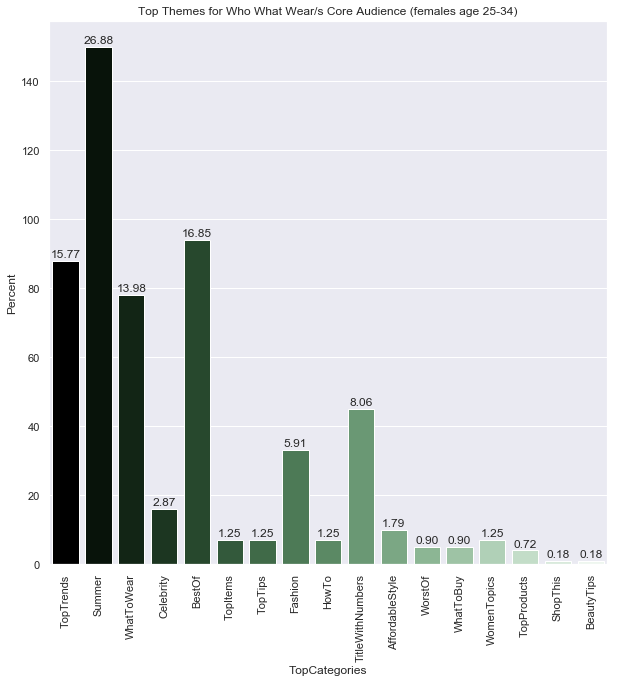

In [42]:
# Plot counts and show percentages
ax = sns.countplot(x='TopCategories', data=top_25_percentile, palette=color_palette)

# Percentages added from source code:
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn/31754317
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 1,
            '{:1.2f}'.format( (height/len(top_25_percentile['TopCategories'])) * 100),
            ha="center")  
ax.set(title='Top Themes for Who What Wear/s Core Audience (females age 25-34)', ylabel='Percent')
plt.xticks(rotation=90)
plt.savefig('topcategories.png', dpi=300)
plt.show()

### Conclusion to Question 2: 
Of the articles receiving the top 25% of pageviews (approximately 200 articles out of a total of 800), the following 5 categories received the top number of pageviews, and thus, resonate the most with Who What Wear's core audience:
1. **Summer**(*~27% of the top 25%*)
2. **Best Of**(*~18% of the top 25%*)
3. **What To Wear**(*~14.5% of the top 25%*)
4. **Top Trends**(*~14.5% of the top 25% *)
Further analyses can be performed to accurately select which categories should be used within the SQL query as well as incorporate the differences between the sources of the articles.